In [1]:
# cite from http://jonathanweisberg.org/post/A%20Neural%20Network%20from%20Scratch%20-%20Part%201/
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata("MNIST original")

In [3]:
X, Y = mnist["data"], mnist["target"]

In [4]:
# normalize X by dividing with 255 
X = X / 255.
# mnist dataset with 70k observations containing vectors of 784 elements (32x32 images)
Y.shape

(70000,)

In [5]:
# select observation for training and testing
num_train = 60000
num_test = X.shape[0] - num_train
X_train, X_test = X[:num_train], X[num_train:]
Y_train, Y_Test = Y[:num_train],Y[num_train:]

In [6]:
print(X_train.shape)
print(Y_train.shape)

(60000, 784)
(60000,)


In [7]:
# shuffle the training set
import numpy as np
np.random.seed(1984)
shuffle_index = np.random.permutation(num_train)
X_train, Y_train = X_train[shuffle_index,:], Y_train[shuffle_index]

<function matplotlib.pyplot.show>

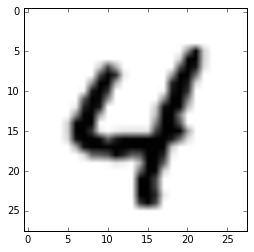

In [8]:
# test the image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 10
plt.imshow(X_train[i,:].reshape(28,28),cmap=matplotlib.cm.binary)
plt.show

In [9]:
# single neuron (logistic regression)
# Forward propagation
# sigmoid function
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

# sigmoid will be our activation function
# y_hat = act_func(wT * X + b)

In [36]:
# Cost Function
# using cross entropy
# single training function
# L(y,y_hat) = -y log(y_hat) - (1-y)*log(1-y_hat)
# Averaging over m training examples
# L(Y,Y_hat) = - 1/m * sum(y_i log(y_hat_i) + (1-y_i)log(1-y_hat_i))
def compute_loss(Y,Y_hat):
    Y = Y.reshape(len(Y),1)
    print("Y.shape",Y.shape)
    print("Y_hat.shape",Y_hat.shape)
    m = Y.shape[0]
    #print(m)
    #testa = np.multiply(np.log(Y_hat.T),Y.T)
    #testa = np.multiply((1-Y[0:10].T),np.log(1-Y_hat[0:10].T))
    #print(testa.shape)
    #print("np.log(Y_hat.T)",np.log(Y_hat.T))
    print("np.log(1-Y_hat.T)",np.log(1-Y_hat.T))
    L = -(1./m) * (np.sum(np.multiply(np.log(Y_hat.T),Y.T))+np.sum(np.multiply(np.log(1-Y_hat.T),(1-Y.T))))
    print(L)
    #print("L.shape",L.shape)
    return L       
    


In [37]:
learning_rate = 1

X = X_train
Y = Y_train

# n_x is number of features to check
n_x = X.shape[1]
m = X.shape[0]

# set initial weights and biases
W = np.random.randn(n_x,1) * 0.01
print("W.shape (init)",W.shape)
b = np.zeros((1,1))
print("b.shape (init)",b.shape)

for i in range(2000):
    print(i)
    Z = np.matmul(W.T,X.T) + b
    #print("Z.shape",Z.shape)
    A = sigmoid(Z.T)
    cost = compute_loss(Y,A)
    #print("cost.shape",cost.shape)
#    aaa   
    #print("A.shape: ",A.shape)
    #print("Y.shape: ",Y.shape)
    #print("X.shape: ",X.shape)
    #print((A.T-Y.reshape(1,len(Y))).shape)
    dW = (1/m) * np.matmul(X.T,(A.T-Y.reshape(1,len(Y))).T)
    #print("dw.shape",dW.shape)
    db = (1/m) * np.sum(A.T-Y.reshape(1,len(Y)),axis=1,keepdims=True)
    #print("db.shape",db.shape)

    
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    print("Wi.shape",W.shape)
    print("bi.shape",b.shape)
    
    if (i%100 == 0):
        print("Epoch", i, "cost:",cost)

print("Final cost:",cost)

W.shape (init) (784, 1)
b.shape (init) (1, 1)
0
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-0.7006997  -0.69919722 -0.63525944 ..., -0.75359714 -0.64872666
  -0.66380021]]
0.811209247521
Wi.shape (784, 1)
bi.shape (1, 1)
Epoch 0 cost: 0.811209247521
1
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
2
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
3
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan


/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log
/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log
/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in multiply


Wi.shape (784, 1)
bi.shape (1, 1)
4
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
5
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
6
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
7
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
8
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
9
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
10
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape

Wi.shape (784, 1)
bi.shape (1, 1)
66
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
67
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
68
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
69
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
70
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
71
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
72
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi

Wi.shape (784, 1)
bi.shape (1, 1)
125
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
126
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
127
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
128
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
129
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
130
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
131
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784

Wi.shape (784, 1)
bi.shape (1, 1)
184
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
185
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
186
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
187
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
188
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
189
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
190
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
245
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
246
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
247
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
248
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
249
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
250
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
251
Y.shape (6000

Wi.shape (784, 1)
bi.shape (1, 1)
305
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
306
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
307
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
308
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
309
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
310
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
311
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
366
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
367
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
368
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
369
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
370
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
371
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
372
Y.shape (6000

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
427
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
428
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
429
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
430
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
431
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
432
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
433
Y.shape (6000

Wi.shape (784, 1)
bi.shape (1, 1)
488
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
489
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
490
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
491
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
492
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
493
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
494
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784

Wi.shape (784, 1)
bi.shape (1, 1)
548
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
549
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
550
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
551
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
552
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
553
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
554
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784

Wi.shape (784, 1)
bi.shape (1, 1)
606
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
607
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
608
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
609
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
610
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
611
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
612
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
665
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
666
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
667
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
668
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
669
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
670
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
671
Y.shape (6000

Wi.shape (784, 1)
bi.shape (1, 1)
726
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
727
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
728
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
729
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
730
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
731
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
732
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
785
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
786
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
787
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
788
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
789
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
790
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
791
Y.shape (6000

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
844
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
845
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
846
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
847
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
848
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
849
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
850
Y.shape (6000

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
904
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
905
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
906
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
907
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
908
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
909
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
910
Y.shape (6000

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
967
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
968
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
969
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
970
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
971
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
972
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
973
Y.shape (6000

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1027
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1028
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1029
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1030
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1031
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1032
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1033
Y.shap

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1088
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1089
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1090
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1091
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1092
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1093
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1094
Y.shap

np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1148
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1149
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1150
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1151
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1152
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1153
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1154
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log

Wi.shape (784, 1)
bi.shape (1, 1)
1210
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1211
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1212
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1213
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1214
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1215
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1216
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.sha

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1270
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1271
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1272
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1273
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1274
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1275
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1276
Y.shap

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1329
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1330
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1331
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1332
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1333
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1334
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1335
Y.shap

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1387
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1388
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1389
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1390
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1391
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1392
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1393
Y.shap

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1446
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1447
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1448
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1449
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1450
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1451
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1452
Y.shap

Wi.shape (784, 1)
bi.shape (1, 1)
1505
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1506
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1507
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1508
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1509
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1510
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1511
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.sha

Wi.shape (784, 1)
bi.shape (1, 1)
1563
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1564
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1565
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1566
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1567
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1568
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1569
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.sha

Wi.shape (784, 1)
bi.shape (1, 1)
1621
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1622
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1623
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1624
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1625
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1626
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1627
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.sha

Wi.shape (784, 1)
bi.shape (1, 1)
1683
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1684
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1685
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1686
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1687
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1688
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1689
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.sha

Wi.shape (784, 1)
bi.shape (1, 1)
1741
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1742
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1743
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1744
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1745
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1746
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1747
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.sha

Wi.shape (784, 1)
bi.shape (1, 1)
1799
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1800
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
Epoch 1800 cost: nan
1801
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1802
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1803
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1804
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1805
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -

Wi.shape (784, 1)
bi.shape (1, 1)
1859
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1860
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1861
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1862
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1863
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1864
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1865
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.sha

Wi.shape (784, 1)
bi.shape (1, 1)
1918
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1919
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1920
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1921
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1922
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1923
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1924
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.sha

Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1981
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1982
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1983
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1984
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1985
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1986
Y.shape (60000, 1)
Y_hat.shape (60000, 1)
np.log(1-Y_hat.T) [[-inf -inf -inf ..., -inf -inf -inf]]
nan
Wi.shape (784, 1)
bi.shape (1, 1)
1987
Y.shap

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

Z = np.matmul(W.T,X_test.T) + b
A = sigmoid(Z.T)

print("A.shape",A.T.shape)

predictions = (A.T>.5)[0,:]
print("predictions.shape",predictions.shape)
labels = (Y_Test.T == 1)
#labels = labels.reshape(1,len(labels))

print(confusion_matrix(predictions,labels))

A.shape (1, 10000)
predictions.shape (10000,)
[[   0    0]
 [8865 1135]]


In [53]:
print(classification_report(predictions,labels))

             precision    recall  f1-score   support

      False       0.00      0.00      0.00         0
       True       1.00      0.11      0.20     10000

avg / total       1.00      0.11      0.20     10000



/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [46]:
np.matmul(X.T,W).shape

(784, 1)